In [1]:
import tensorflow as tf

In [3]:
w = tf.Variable(2.)

In [4]:
def f(w):
    y = w**2
    z=2*y+5
    return z

In [5]:
with tf.GradientTape() as tape:
    z = f(w)

In [6]:
gradients = tape.gradient(z, [w])

In [7]:
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [8]:
W = tf.Variable(4.0)

In [9]:
b = tf.Variable(1.0)

In [10]:
@tf.function
def hypothesis(x):
    return W*x + b

In [11]:
x_test = [3.5, 5, 5.5, 6]

In [12]:
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [13]:
print(hypothesis(x_test))

tf.Tensor([15. 21. 23. 25.], shape=(4,), dtype=float32)


In [20]:
@tf.function
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

In [30]:
W = tf.Variable(4.0)
b = tf.Variable(1.0)
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적
y_pred = 0

@tf.function
def hypothesis(x):
    return W*x + b

@tf.function
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

In [16]:
optimizer = tf.optimizers.SGD(0.01)

In [31]:

for i in range(301):
    with tf.GradientTape() as tape:
        y_pred = hypothesis(X)
        cost = mse_loss(y_pred,y)
        
    gradients = tape.gradient(cost,[W, b])
    
    optimizer.apply_gradients(zip(gradients, [W,b]))
    if i%10 == 0:
        print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))
        

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [32]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [35]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [36]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

In [37]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation = 'linear'))

In [39]:
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

In [40]:
model.fit(X,y, batch_size=1, epochs = 300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 1s 2ms/step - loss: 273.3591 - mse: 273.3591
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0917 - mse: 2.0917
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0934 - mse: 2.0934
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0950 - mse: 2.0950
Epoch 5/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0966 - mse: 2.0966
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0981 - mse: 2.0981
Epoch 7/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0996 - mse: 2.0996
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1011 - mse: 2.1011
Epoch 9/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1025 - mse: 2.1025
Epoch 10/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1039 - mse: 2.1039
Epoch 11/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1

9/9 [==============================] - 0s 2ms/step - loss: 2.1458 - mse: 2.1458
Epoch 177/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1459 - mse: 2.1459
Epoch 178/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1459 - mse: 2.1459
Epoch 179/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1459 - mse: 2.1459
Epoch 180/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1459 - mse: 2.1459
Epoch 181/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1459 - mse: 2.1459
Epoch 182/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1459 - mse: 2.1459
Epoch 183/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1459 - mse: 2.1459
Epoch 184/300
9/9 [==============================] - 0s 3ms/step - loss: 2.1459 - mse: 2.1459
Epoch 185/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1459 - mse: 2.1459
Epoch 186/300
9/9 [==============================] - 0s 2ms/step - loss: 2

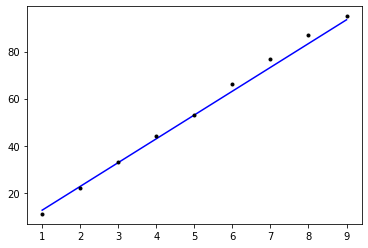

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b',X,y,'k.')

In [43]:
print(model.predict([9.5]))

[[98.556465]]


In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [4]:
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #숫자 10부터 1

In [5]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

In [6]:
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [7]:
model.fit(X,y,batch_size=1, epochs=200, shuffle=False)

Epoch 1/200
13/13 [==============================] - 1s 2ms/step - loss: 0.5895 - binary_accuracy: 0.9231
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 0.5687 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 1ms/step - loss: 0.5478 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.5270 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 0.5063 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.4856 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 0.4649 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [==============================] - 0s 4ms/step - loss: 0.4444 - binary_accuracy: 0.9231
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 0.4240 - binary_accuracy: 0.9231
Epoch 10/200
13/13 [==========================

13/13 [==============================] - 0s 2ms/step - loss: 0.1277 - binary_accuracy: 0.9231
Epoch 78/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1271 - binary_accuracy: 0.9231
Epoch 79/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1266 - binary_accuracy: 0.9231
Epoch 80/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1261 - binary_accuracy: 0.9231
Epoch 81/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1255 - binary_accuracy: 0.9231
Epoch 82/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1250 - binary_accuracy: 0.9231
Epoch 83/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1245 - binary_accuracy: 0.9231
Epoch 84/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1239 - binary_accuracy: 0.9231
Epoch 85/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1234 - binary_accuracy: 0.9231
Epoch 86/200
13/13 [==============================

13/13 [==============================] - 0s 2ms/step - loss: 0.0985 - binary_accuracy: 0.9231
Epoch 154/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0983 - binary_accuracy: 0.9231
Epoch 155/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0980 - binary_accuracy: 0.9231
Epoch 156/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0977 - binary_accuracy: 0.9231
Epoch 157/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0975 - binary_accuracy: 0.9231
Epoch 158/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0972 - binary_accuracy: 0.9231
Epoch 159/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0970 - binary_accuracy: 0.9231
Epoch 160/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0967 - binary_accuracy: 0.9231
Epoch 161/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0965 - binary_accuracy: 0.9231
Epoch 162/200
13/13 [=====================

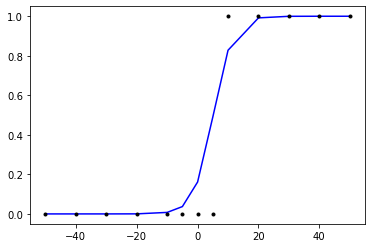

In [8]:
plt.plot(X,model.predict(X), 'b',X,y,'k.')

In [9]:
print(model.predict([1, 2, 3, 4, 4.5]))

[[0.2098329 ]
 [0.26816118]
 [0.3358125 ]
 [0.4109473 ]
 [0.4503961 ]]


In [10]:
print(model.predict([11, 21, 31, 41, 500]))

[[0.8691739 ]
 [0.9940196 ]
 [0.99975955]
 [0.99999034]
 [1.        ]]


In [11]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [12]:
X = np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]])

In [13]:
y = np.array([73,82,72,57,34])

In [14]:
model = Sequential()
model.add(Dense(1, input_dim = 3, activation='linear'))

In [15]:
sgd = optimizers.SGD(learning_rate = 0.00001)

In [16]:
model.compile(optimizer = sgd, loss='mse',metrics = ['mse'])

In [17]:
model.fit(X,y,batch_size=1,epochs=2000, shuffle=False)

Epoch 1/2000
5/5 [==============================] - 0s 2ms/step - loss: 2528.3013 - mse: 2528.3013
Epoch 2/2000
5/5 [==============================] - 0s 2ms/step - loss: 1316.6515 - mse: 1316.6515
Epoch 3/2000
5/5 [==============================] - 0s 3ms/step - loss: 1063.3405 - mse: 1063.3405
Epoch 4/2000
5/5 [==============================] - 0s 3ms/step - loss: 910.9102 - mse: 910.9102
Epoch 5/2000
5/5 [==============================] - 0s 3ms/step - loss: 776.6872 - mse: 776.6872
Epoch 6/2000
5/5 [==============================] - 0s 3ms/step - loss: 659.4206 - mse: 659.4206
Epoch 7/2000
5/5 [==============================] - 0s 3ms/step - loss: 560.1942 - mse: 560.1942
Epoch 8/2000
5/5 [==============================] - 0s 3ms/step - loss: 477.6698 - mse: 477.6698
Epoch 9/2000
5/5 [==============================] - 0s 3ms/step - loss: 409.5597 - mse: 409.5597
Epoch 10/2000
5/5 [==============================] - 0s 3ms/step - loss: 353.5192 - mse: 353.5192
Epoch 11/2000
5/5 [====

5/5 [==============================] - 0s 2ms/step - loss: 72.7397 - mse: 72.7397
Epoch 86/2000
5/5 [==============================] - 0s 2ms/step - loss: 72.4727 - mse: 72.4727
Epoch 87/2000
5/5 [==============================] - 0s 2ms/step - loss: 72.2068 - mse: 72.2068
Epoch 88/2000
5/5 [==============================] - 0s 2ms/step - loss: 71.9418 - mse: 71.9418
Epoch 89/2000
5/5 [==============================] - 0s 2ms/step - loss: 71.6779 - mse: 71.6779
Epoch 90/2000
5/5 [==============================] - 0s 2ms/step - loss: 71.4150 - mse: 71.4150
Epoch 91/2000
5/5 [==============================] - 0s 2ms/step - loss: 71.1531 - mse: 71.1531
Epoch 92/2000
5/5 [==============================] - 0s 2ms/step - loss: 70.8923 - mse: 70.8923
Epoch 93/2000
5/5 [==============================] - 0s 2ms/step - loss: 70.6324 - mse: 70.6324
Epoch 94/2000
5/5 [==============================] - 0s 2ms/step - loss: 70.3735 - mse: 70.3735
Epoch 95/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 53.4460 - mse: 53.4460
Epoch 170/2000
5/5 [==============================] - 0s 2ms/step - loss: 53.2503 - mse: 53.2503
Epoch 171/2000
5/5 [==============================] - 0s 2ms/step - loss: 53.0553 - mse: 53.0553
Epoch 172/2000
5/5 [==============================] - 0s 2ms/step - loss: 52.8610 - mse: 52.8610
Epoch 173/2000
5/5 [==============================] - 0s 2ms/step - loss: 52.6675 - mse: 52.6675
Epoch 174/2000
5/5 [==============================] - 0s 2ms/step - loss: 52.4747 - mse: 52.4747
Epoch 175/2000
5/5 [==============================] - 0s 2ms/step - loss: 52.2825 - mse: 52.2825
Epoch 176/2000
5/5 [==============================] - 0s 2ms/step - loss: 52.0912 - mse: 52.0912
Epoch 177/2000
5/5 [==============================] - 0s 2ms/step - loss: 51.9004 - mse: 51.9004
Epoch 178/2000
5/5 [==============================] - 0s 2ms/step - loss: 51.7104 - mse: 51.7104
Epoch 179/2000
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 39.2738 - mse: 39.2738
Epoch 254/2000
5/5 [==============================] - 0s 2ms/step - loss: 39.1300 - mse: 39.1300
Epoch 255/2000
5/5 [==============================] - 0s 2ms/step - loss: 38.9868 - mse: 38.9868
Epoch 256/2000
5/5 [==============================] - 0s 2ms/step - loss: 38.8440 - mse: 38.8440
Epoch 257/2000
5/5 [==============================] - 0s 2ms/step - loss: 38.7018 - mse: 38.7018
Epoch 258/2000
5/5 [==============================] - 0s 2ms/step - loss: 38.5602 - mse: 38.5602
Epoch 259/2000
5/5 [==============================] - 0s 2ms/step - loss: 38.4189 - mse: 38.4189
Epoch 260/2000
5/5 [==============================] - 0s 2ms/step - loss: 38.2783 - mse: 38.2783
Epoch 261/2000
5/5 [==============================] - 0s 2ms/step - loss: 38.1382 - mse: 38.1382
Epoch 262/2000
5/5 [==============================] - 0s 2ms/step - loss: 37.9985 - mse: 37.9985
Epoch 263/2000
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 28.8600 - mse: 28.8600
Epoch 338/2000
5/5 [==============================] - 0s 2ms/step - loss: 28.7544 - mse: 28.7544
Epoch 339/2000
5/5 [==============================] - 0s 2ms/step - loss: 28.6491 - mse: 28.6491
Epoch 340/2000
5/5 [==============================] - 0s 2ms/step - loss: 28.5442 - mse: 28.5442
Epoch 341/2000
5/5 [==============================] - 0s 2ms/step - loss: 28.4397 - mse: 28.4397
Epoch 342/2000
5/5 [==============================] - 0s 2ms/step - loss: 28.3356 - mse: 28.3356
Epoch 343/2000
5/5 [==============================] - 0s 2ms/step - loss: 28.2318 - mse: 28.2318
Epoch 344/2000
5/5 [==============================] - 0s 2ms/step - loss: 28.1285 - mse: 28.1285
Epoch 345/2000
5/5 [==============================] - 0s 2ms/step - loss: 28.0256 - mse: 28.0256
Epoch 346/2000
5/5 [==============================] - 0s 2ms/step - loss: 27.9229 - mse: 27.9229
Epoch 347/2000
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 21.2079 - mse: 21.2079
Epoch 422/2000
5/5 [==============================] - 0s 2ms/step - loss: 21.1303 - mse: 21.1303
Epoch 423/2000
5/5 [==============================] - 0s 2ms/step - loss: 21.0530 - mse: 21.0530
Epoch 424/2000
5/5 [==============================] - 0s 2ms/step - loss: 20.9759 - mse: 20.9759
Epoch 425/2000
5/5 [==============================] - 0s 2ms/step - loss: 20.8991 - mse: 20.8991
Epoch 426/2000
5/5 [==============================] - 0s 2ms/step - loss: 20.8226 - mse: 20.8226
Epoch 427/2000
5/5 [==============================] - 0s 2ms/step - loss: 20.7464 - mse: 20.7464
Epoch 428/2000
5/5 [==============================] - 0s 2ms/step - loss: 20.6705 - mse: 20.6705
Epoch 429/2000
5/5 [==============================] - 0s 2ms/step - loss: 20.5948 - mse: 20.5948
Epoch 430/2000
5/5 [==============================] - 0s 2ms/step - loss: 20.5194 - mse: 20.5194
Epoch 431/2000
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 15.5853 - mse: 15.5853
Epoch 506/2000
5/5 [==============================] - 0s 2ms/step - loss: 15.5283 - mse: 15.5283
Epoch 507/2000
5/5 [==============================] - 0s 2ms/step - loss: 15.4714 - mse: 15.4714
Epoch 508/2000
5/5 [==============================] - 0s 2ms/step - loss: 15.4148 - mse: 15.4148
Epoch 509/2000
5/5 [==============================] - 0s 2ms/step - loss: 15.3584 - mse: 15.3584
Epoch 510/2000
5/5 [==============================] - 0s 2ms/step - loss: 15.3022 - mse: 15.3022
Epoch 511/2000
5/5 [==============================] - 0s 2ms/step - loss: 15.2462 - mse: 15.2462
Epoch 512/2000
5/5 [==============================] - 0s 2ms/step - loss: 15.1904 - mse: 15.1904
Epoch 513/2000
5/5 [==============================] - 0s 2ms/step - loss: 15.1347 - mse: 15.1347
Epoch 514/2000
5/5 [==============================] - 0s 2ms/step - loss: 15.0794 - mse: 15.0794
Epoch 515/2000
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 11.4539 - mse: 11.4539
Epoch 590/2000
5/5 [==============================] - 0s 2ms/step - loss: 11.4120 - mse: 11.4120
Epoch 591/2000
5/5 [==============================] - 0s 2ms/step - loss: 11.3702 - mse: 11.3702
Epoch 592/2000
5/5 [==============================] - 0s 2ms/step - loss: 11.3286 - mse: 11.3286
Epoch 593/2000
5/5 [==============================] - 0s 2ms/step - loss: 11.2871 - mse: 11.2871
Epoch 594/2000
5/5 [==============================] - 0s 2ms/step - loss: 11.2458 - mse: 11.2458
Epoch 595/2000
5/5 [==============================] - 0s 2ms/step - loss: 11.2047 - mse: 11.2047
Epoch 596/2000
5/5 [==============================] - 0s 2ms/step - loss: 11.1637 - mse: 11.1637
Epoch 597/2000
5/5 [==============================] - 0s 2ms/step - loss: 11.1228 - mse: 11.1228
Epoch 598/2000
5/5 [==============================] - 0s 2ms/step - loss: 11.0821 - mse: 11.0821
Epoch 599/2000
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 8.3875 - mse: 8.3875
Epoch 675/2000
5/5 [==============================] - 0s 2ms/step - loss: 8.3568 - mse: 8.3568
Epoch 676/2000
5/5 [==============================] - 0s 2ms/step - loss: 8.3262 - mse: 8.3262
Epoch 677/2000
5/5 [==============================] - 0s 2ms/step - loss: 8.2957 - mse: 8.2957
Epoch 678/2000
5/5 [==============================] - 0s 2ms/step - loss: 8.2654 - mse: 8.2654
Epoch 679/2000
5/5 [==============================] - 0s 2ms/step - loss: 8.2352 - mse: 8.2352
Epoch 680/2000
5/5 [==============================] - 0s 2ms/step - loss: 8.2050 - mse: 8.2050
Epoch 681/2000
5/5 [==============================] - 0s 2ms/step - loss: 8.1750 - mse: 8.1750
Epoch 682/2000
5/5 [==============================] - 0s 2ms/step - loss: 8.1451 - mse: 8.1451
Epoch 683/2000
5/5 [==============================] - 0s 2ms/step - loss: 8.1153 - mse: 8.1153
Epoch 684/2000
5/5 [==============================] - 0s 2ms/step

5/5 [==============================] - 0s 2ms/step - loss: 6.1202 - mse: 6.1202
Epoch 761/2000
5/5 [==============================] - 0s 2ms/step - loss: 6.0978 - mse: 6.0978
Epoch 762/2000
5/5 [==============================] - 0s 2ms/step - loss: 6.0755 - mse: 6.0755
Epoch 763/2000
5/5 [==============================] - 0s 2ms/step - loss: 6.0533 - mse: 6.0533
Epoch 764/2000
5/5 [==============================] - 0s 2ms/step - loss: 6.0312 - mse: 6.0312
Epoch 765/2000
5/5 [==============================] - 0s 2ms/step - loss: 6.0091 - mse: 6.0091
Epoch 766/2000
5/5 [==============================] - 0s 2ms/step - loss: 5.9871 - mse: 5.9871
Epoch 767/2000
5/5 [==============================] - 0s 2ms/step - loss: 5.9652 - mse: 5.9652
Epoch 768/2000
5/5 [==============================] - 0s 2ms/step - loss: 5.9434 - mse: 5.9434
Epoch 769/2000
5/5 [==============================] - 0s 2ms/step - loss: 5.9217 - mse: 5.9217
Epoch 770/2000
5/5 [==============================] - 0s 2ms/step

5/5 [==============================] - 0s 2ms/step - loss: 4.4665 - mse: 4.4665
Epoch 847/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.4502 - mse: 4.4502
Epoch 848/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.4339 - mse: 4.4339
Epoch 849/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.4177 - mse: 4.4177
Epoch 850/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.4016 - mse: 4.4016
Epoch 851/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.3855 - mse: 4.3855
Epoch 852/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.3695 - mse: 4.3695
Epoch 853/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.3535 - mse: 4.3535
Epoch 854/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.3376 - mse: 4.3376
Epoch 855/2000
5/5 [==============================] - 0s 2ms/step - loss: 4.3218 - mse: 4.3218
Epoch 856/2000
5/5 [==============================] - 0s 2ms/step

5/5 [==============================] - 0s 2ms/step - loss: 3.2605 - mse: 3.2605
Epoch 933/2000
5/5 [==============================] - 0s 2ms/step - loss: 3.2486 - mse: 3.2486
Epoch 934/2000
5/5 [==============================] - 0s 2ms/step - loss: 3.2367 - mse: 3.2367
Epoch 935/2000
5/5 [==============================] - 0s 2ms/step - loss: 3.2249 - mse: 3.2249
Epoch 936/2000
5/5 [==============================] - 0s 2ms/step - loss: 3.2131 - mse: 3.2131
Epoch 937/2000
5/5 [==============================] - 0s 2ms/step - loss: 3.2014 - mse: 3.2014
Epoch 938/2000
5/5 [==============================] - 0s 2ms/step - loss: 3.1897 - mse: 3.1897
Epoch 939/2000
5/5 [==============================] - 0s 2ms/step - loss: 3.1780 - mse: 3.1780
Epoch 940/2000
5/5 [==============================] - 0s 2ms/step - loss: 3.1664 - mse: 3.1664
Epoch 941/2000
5/5 [==============================] - 0s 2ms/step - loss: 3.1549 - mse: 3.1549
Epoch 942/2000
5/5 [==============================] - 0s 2ms/step

5/5 [==============================] - 0s 2ms/step - loss: 2.3809 - mse: 2.3809
Epoch 1019/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.3722 - mse: 2.3722
Epoch 1020/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.3635 - mse: 2.3635
Epoch 1021/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.3549 - mse: 2.3549
Epoch 1022/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.3463 - mse: 2.3463
Epoch 1023/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.3378 - mse: 2.3378
Epoch 1024/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.3293 - mse: 2.3293
Epoch 1025/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.3208 - mse: 2.3208
Epoch 1026/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.3123 - mse: 2.3123
Epoch 1027/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.3039 - mse: 2.3039
Epoch 1028/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 1.7457 - mse: 1.7457
Epoch 1104/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.7394 - mse: 1.7394
Epoch 1105/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.7331 - mse: 1.7331
Epoch 1106/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.7268 - mse: 1.7268
Epoch 1107/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.7205 - mse: 1.7205
Epoch 1108/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.7142 - mse: 1.7142
Epoch 1109/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.7080 - mse: 1.7080
Epoch 1110/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.7017 - mse: 1.7017
Epoch 1111/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.6956 - mse: 1.6956
Epoch 1112/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.6894 - mse: 1.6894
Epoch 1113/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 1.2809 - mse: 1.2809
Epoch 1189/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.2762 - mse: 1.2762
Epoch 1190/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.2716 - mse: 1.2716
Epoch 1191/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.2670 - mse: 1.2670
Epoch 1192/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.2624 - mse: 1.2624
Epoch 1193/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.2578 - mse: 1.2578
Epoch 1194/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.2532 - mse: 1.2532
Epoch 1195/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.2487 - mse: 1.2487
Epoch 1196/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.2441 - mse: 1.2441
Epoch 1197/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.2396 - mse: 1.2396
Epoch 1198/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.9407 - mse: 0.9407
Epoch 1274/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.9372 - mse: 0.9372
Epoch 1275/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.9339 - mse: 0.9339
Epoch 1276/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.9305 - mse: 0.9305
Epoch 1277/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.9271 - mse: 0.9271
Epoch 1278/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.9238 - mse: 0.9238
Epoch 1279/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.9204 - mse: 0.9204
Epoch 1280/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.9171 - mse: 0.9171
Epoch 1281/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.9138 - mse: 0.9138
Epoch 1282/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.9105 - mse: 0.9105
Epoch 1283/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.6917 - mse: 0.6917
Epoch 1359/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6892 - mse: 0.6892
Epoch 1360/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6867 - mse: 0.6867
Epoch 1361/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6842 - mse: 0.6842
Epoch 1362/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6818 - mse: 0.6818
Epoch 1363/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6793 - mse: 0.6793
Epoch 1364/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6769 - mse: 0.6769
Epoch 1365/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6744 - mse: 0.6744
Epoch 1366/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6720 - mse: 0.6720
Epoch 1367/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6696 - mse: 0.6696
Epoch 1368/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.5095 - mse: 0.5095
Epoch 1444/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.5076 - mse: 0.5076
Epoch 1445/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.5058 - mse: 0.5058
Epoch 1446/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.5040 - mse: 0.5040
Epoch 1447/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.5022 - mse: 0.5022
Epoch 1448/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.5004 - mse: 0.5004
Epoch 1449/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.4986 - mse: 0.4986
Epoch 1450/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.4968 - mse: 0.4968
Epoch 1451/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.4951 - mse: 0.4951
Epoch 1452/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.4933 - mse: 0.4933
Epoch 1453/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.3761 - mse: 0.3761
Epoch 1529/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.3748 - mse: 0.3748
Epoch 1530/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.3735 - mse: 0.3735
Epoch 1531/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.3721 - mse: 0.3721
Epoch 1532/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.3708 - mse: 0.3708
Epoch 1533/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.3695 - mse: 0.3695
Epoch 1534/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3682 - mse: 0.3682
Epoch 1535/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.3669 - mse: 0.3669
Epoch 1536/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.3656 - mse: 0.3656
Epoch 1537/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.3643 - mse: 0.3643
Epoch 1538/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.2786 - mse: 0.2786
Epoch 1614/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2776 - mse: 0.2776
Epoch 1615/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2766 - mse: 0.2766
Epoch 1616/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2757 - mse: 0.2757
Epoch 1617/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2747 - mse: 0.2747
Epoch 1618/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2737 - mse: 0.2737
Epoch 1619/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2728 - mse: 0.2728
Epoch 1620/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2718 - mse: 0.2718
Epoch 1621/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2709 - mse: 0.2709
Epoch 1622/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2699 - mse: 0.2699
Epoch 1623/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.2072 - mse: 0.2072
Epoch 1699/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2065 - mse: 0.2065
Epoch 1700/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2058 - mse: 0.2058
Epoch 1701/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2051 - mse: 0.2051
Epoch 1702/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2044 - mse: 0.2044
Epoch 1703/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2037 - mse: 0.2037
Epoch 1704/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2030 - mse: 0.2030
Epoch 1705/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2023 - mse: 0.2023
Epoch 1706/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2016 - mse: 0.2016
Epoch 1707/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2009 - mse: 0.2009
Epoch 1708/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.1550 - mse: 0.1550
Epoch 1784/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1545 - mse: 0.1545
Epoch 1785/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1540 - mse: 0.1540
Epoch 1786/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1535 - mse: 0.1535
Epoch 1787/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1529 - mse: 0.1529
Epoch 1788/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1524 - mse: 0.1524
Epoch 1789/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1519 - mse: 0.1519
Epoch 1790/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1514 - mse: 0.1514
Epoch 1791/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509
Epoch 1792/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1504 - mse: 0.1504
Epoch 1793/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.1168 - mse: 0.1168
Epoch 1869/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1165 - mse: 0.1165
Epoch 1870/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.1161
Epoch 1871/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1157 - mse: 0.1157
Epoch 1872/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 1873/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149
Epoch 1874/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 1875/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142
Epoch 1876/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.1138
Epoch 1877/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1134 - mse: 0.1134
Epoch 1878/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.0889 - mse: 0.0889
Epoch 1954/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0886 - mse: 0.0886
Epoch 1955/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0884 - mse: 0.0884
Epoch 1956/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0881 - mse: 0.0881
Epoch 1957/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 1958/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0875 - mse: 0.0875
Epoch 1959/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0873 - mse: 0.0873
Epoch 1960/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0870 - mse: 0.0870
Epoch 1961/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0867 - mse: 0.0867
Epoch 1962/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.0864 - mse: 0.0864
Epoch 1963/2000
5/5 [==============================] - 0

In [18]:
print(model.predict(X))

[[73.31372 ]
 [81.99177 ]
 [71.830986]
 [57.18947 ]
 [33.578445]]


In [19]:
X_test = np.array([[20,99,10],[40,50,20]])
print(model.predict(X_test))

[[58.22164 ]
 [55.520126]]


In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [21]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y= np.array([0, 1, 1, 1])

In [23]:
model = Sequential()
model.add(Dense(1,input_dim=2,activation='sigmoid'))

In [24]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [25]:
model.fit(X,y, batch_size=1, epochs=800,shuffle=False)

Epoch 1/800
4/4 [==============================] - 1s 2ms/step - loss: 0.3989 - binary_accuracy: 1.0000
Epoch 2/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3976 - binary_accuracy: 0.7500
Epoch 3/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3964 - binary_accuracy: 0.7500
Epoch 4/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3952 - binary_accuracy: 0.7500
Epoch 5/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3940 - binary_accuracy: 0.7500
Epoch 6/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3928 - binary_accuracy: 0.7500
Epoch 7/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3917 - binary_accuracy: 0.7500
Epoch 8/800
4/4 [==============================] - 0s 4ms/step - loss: 0.3905 - binary_accuracy: 0.7500
Epoch 9/800
4/4 [==============================] - 0s 3ms/step - loss: 0.3894 - binary_accuracy: 0.7500
Epoch 10/800
4/4 [==============================] - 0s 3ms/step 

Epoch 79/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3386 - binary_accuracy: 0.7500
Epoch 80/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3381 - binary_accuracy: 0.7500
Epoch 81/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3376 - binary_accuracy: 0.7500
Epoch 82/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3371 - binary_accuracy: 0.7500
Epoch 83/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3366 - binary_accuracy: 0.7500
Epoch 84/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3361 - binary_accuracy: 0.7500
Epoch 85/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3356 - binary_accuracy: 0.7500
Epoch 86/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3351 - binary_accuracy: 0.7500
Epoch 87/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3347 - binary_accuracy: 0.7500
Epoch 88/800
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 2ms/step - loss: 0.3074 - binary_accuracy: 0.7500
Epoch 157/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3071 - binary_accuracy: 0.7500
Epoch 158/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3067 - binary_accuracy: 0.7500
Epoch 159/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3064 - binary_accuracy: 0.7500
Epoch 160/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3061 - binary_accuracy: 0.7500
Epoch 161/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3057 - binary_accuracy: 0.7500
Epoch 162/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3054 - binary_accuracy: 0.7500
Epoch 163/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3051 - binary_accuracy: 0.7500
Epoch 164/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3047 - binary_accuracy: 0.7500
Epoch 165/800
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.2841 - binary_accuracy: 0.7500
Epoch 234/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2838 - binary_accuracy: 0.7500
Epoch 235/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2835 - binary_accuracy: 0.7500
Epoch 236/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2832 - binary_accuracy: 0.7500
Epoch 237/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2830 - binary_accuracy: 0.7500
Epoch 238/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2827 - binary_accuracy: 0.7500
Epoch 239/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2824 - binary_accuracy: 0.7500
Epoch 240/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2822 - binary_accuracy: 0.7500
Epoch 241/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2819 - binary_accuracy: 0.7500
Epoch 242/800
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.2645 - binary_accuracy: 1.0000
Epoch 311/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2642 - binary_accuracy: 1.0000
Epoch 312/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2640 - binary_accuracy: 1.0000
Epoch 313/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2638 - binary_accuracy: 1.0000
Epoch 314/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2635 - binary_accuracy: 1.0000
Epoch 315/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2633 - binary_accuracy: 1.0000
Epoch 316/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2631 - binary_accuracy: 1.0000
Epoch 317/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2628 - binary_accuracy: 1.0000
Epoch 318/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2626 - binary_accuracy: 1.0000
Epoch 319/800
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.2474 - binary_accuracy: 1.0000
Epoch 388/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2472 - binary_accuracy: 1.0000
Epoch 389/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2470 - binary_accuracy: 1.0000
Epoch 390/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2468 - binary_accuracy: 1.0000
Epoch 391/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2466 - binary_accuracy: 1.0000
Epoch 392/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2464 - binary_accuracy: 1.0000
Epoch 393/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2461 - binary_accuracy: 1.0000
Epoch 394/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2459 - binary_accuracy: 1.0000
Epoch 395/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2457 - binary_accuracy: 1.0000
Epoch 396/800
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.2323 - binary_accuracy: 1.0000
Epoch 465/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2321 - binary_accuracy: 1.0000
Epoch 466/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2319 - binary_accuracy: 1.0000
Epoch 467/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2317 - binary_accuracy: 1.0000
Epoch 468/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2315 - binary_accuracy: 1.0000
Epoch 469/800
4/4 [==============================] - 0s 3ms/step - loss: 0.2314 - binary_accuracy: 1.0000
Epoch 470/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2312 - binary_accuracy: 1.0000
Epoch 471/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2310 - binary_accuracy: 1.0000
Epoch 472/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2308 - binary_accuracy: 1.0000
Epoch 473/800
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.2188 - binary_accuracy: 1.0000
Epoch 542/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2186 - binary_accuracy: 1.0000
Epoch 543/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2185 - binary_accuracy: 1.0000
Epoch 544/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2183 - binary_accuracy: 1.0000
Epoch 545/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2181 - binary_accuracy: 1.0000
Epoch 546/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2180 - binary_accuracy: 1.0000
Epoch 547/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2178 - binary_accuracy: 1.0000
Epoch 548/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2176 - binary_accuracy: 1.0000
Epoch 549/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2175 - binary_accuracy: 1.0000
Epoch 550/800
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.2067 - binary_accuracy: 1.0000
Epoch 619/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2065 - binary_accuracy: 1.0000
Epoch 620/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - binary_accuracy: 1.0000
Epoch 621/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2062 - binary_accuracy: 1.0000
Epoch 622/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2061 - binary_accuracy: 1.0000
Epoch 623/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2059 - binary_accuracy: 1.0000
Epoch 624/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2058 - binary_accuracy: 1.0000
Epoch 625/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2057 - binary_accuracy: 1.0000
Epoch 626/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2055 - binary_accuracy: 1.0000
Epoch 627/800
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.1958 - binary_accuracy: 1.0000
Epoch 696/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1956 - binary_accuracy: 1.0000
Epoch 697/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1955 - binary_accuracy: 1.0000
Epoch 698/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1954 - binary_accuracy: 1.0000
Epoch 699/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1952 - binary_accuracy: 1.0000
Epoch 700/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1951 - binary_accuracy: 1.0000
Epoch 701/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1950 - binary_accuracy: 1.0000
Epoch 702/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1948 - binary_accuracy: 1.0000
Epoch 703/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1947 - binary_accuracy: 1.0000
Epoch 704/800
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.1859 - binary_accuracy: 1.0000
Epoch 773/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1857 - binary_accuracy: 1.0000
Epoch 774/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1856 - binary_accuracy: 1.0000
Epoch 775/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1855 - binary_accuracy: 1.0000
Epoch 776/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1854 - binary_accuracy: 1.0000
Epoch 777/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1853 - binary_accuracy: 1.0000
Epoch 778/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1851 - binary_accuracy: 1.0000
Epoch 779/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1850 - binary_accuracy: 1.0000
Epoch 780/800
4/4 [==============================] - 0s 2ms/step - loss: 0.1849 - binary_accuracy: 1.0000
Epoch 781/800
4/4 [==============================] - 0s 2ms/

In [26]:
print(model.predict(X))

[[0.35749555]
 [0.8709407 ]
 [0.8726425 ]
 [0.9881098 ]]


In [27]:
import numpy as np

In [28]:
d=np.array(5)
print(d.ndim)
print(d.shape)

0
()


In [29]:
d = np.array([1,2,3,4])
print(d.ndim)
print(d.shape)

1
(4,)


In [30]:
d=np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(d.ndim)
print(d.shape)

2
(3, 4)


In [31]:
d=np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print(d.ndim)
print(d.shape)

3
(2, 3, 5)


In [32]:
a = np.array([8, 4, 5])
b = np.array([1, 2, 3])
print(a+b)
print(a-b)

[9 6 8]
[7 2 2]


In [33]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a,b))

32


In [34]:
a = np.array([[1, 3],[2, 4]])
b = np.array([[5, 7],[6, 8]])
print(np.matmul(a,b))

[[23 31]
 [34 46]]


In [36]:
import pandas as pd
data = pd.read_csv('C:/Users/Jeongyeop/Desktop/iris.csv')

In [37]:
data[:5]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [38]:
len(data)

150

In [40]:
print("품종 종류:",data["variety"].unique(), sep="\n")

품종 종류:
['Setosa' 'Versicolor' 'Virginica']


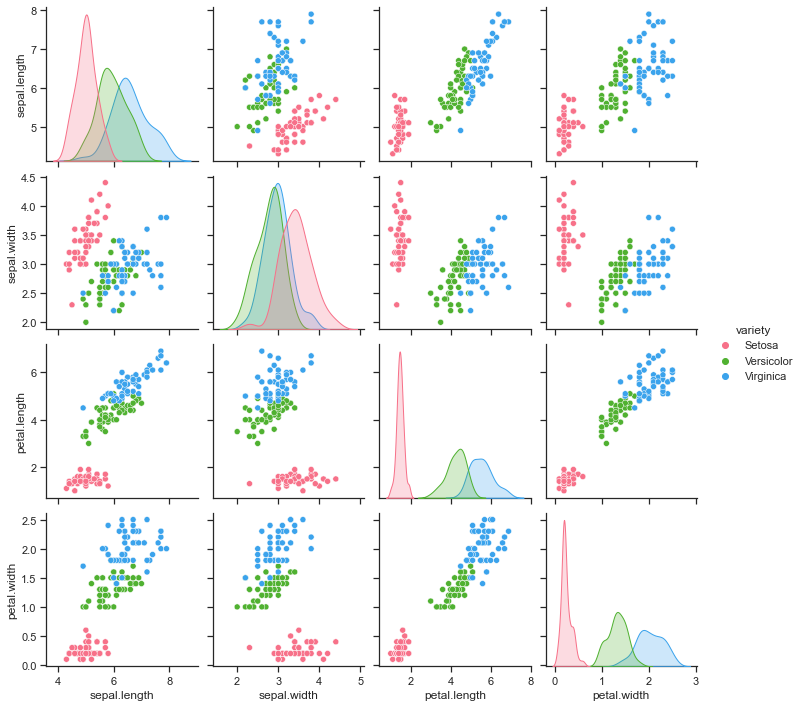

In [41]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data,hue="variety",palette="husl")

<AxesSubplot:xlabel='variety', ylabel='sepal.width'>

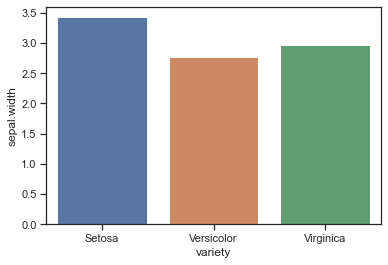

In [43]:
sns.barplot(x = data['variety'], y = data['sepal.width'], ci = None)

<AxesSubplot:>

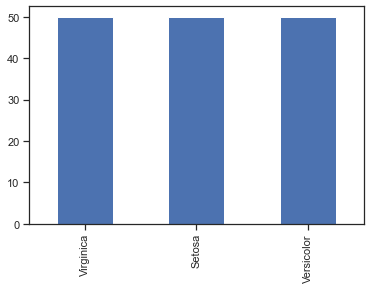

In [44]:
import matplotlib.pyplot as plt
data['variety'].value_counts().plot(kind='bar')

In [45]:
data['variety'] = data['variety'].replace(['Virginica','Setosa','Versicolor'], [0,1,2])

<AxesSubplot:>

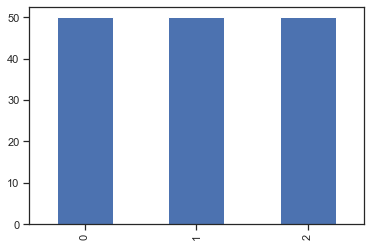

In [46]:
data['variety'].value_counts().plot(kind='bar')

In [47]:
from sklearn.model_selection import train_test_split
data_X = data[['sepal.length', 'sepal.width', 'petal.length','petal.width']].values

In [48]:
data_y = data['variety'].values

In [49]:
print(data_X[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [50]:
print(data_y[:5])

[1 1 1 1 1]


In [51]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X,data_y,train_size=0.8,random_state=1)

In [52]:
from tensorflow.keras.utils import to_categorical

In [53]:
y_train

array([2, 0, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1,
       2, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 2, 0, 0,
       2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1,
       0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       1, 0, 2, 0, 2, 0, 0, 2, 0, 1], dtype=int64)

In [54]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [56]:
print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [58]:
model = Sequential()

In [59]:
model.add(Dense(3, input_dim = 4, activation='softmax'))

In [60]:
sgd = optimizers.SGD(learning_rate = 0.01)

In [61]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
history = model.fit(X_train, y_train, batch_size=1, epochs=300, validation_data = (X_test, y_test))

Epoch 1/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9833 - val_loss: 0.1941 - val_accuracy: 0.9667
Epoch 2/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.9667 - val_loss: 0.1921 - val_accuracy: 0.9667
Epoch 3/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9833 - val_loss: 0.1987 - val_accuracy: 0.9667
Epoch 4/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.9750 - val_loss: 0.1840 - val_accuracy: 1.0000
Epoch 5/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1543 - accuracy: 0.9667 - val_loss: 0.1856 - val_accuracy: 1.0000
Epoch 6/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9667 - val_loss: 0.1949 - val_accuracy: 0.9667
Epoch 7/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1534 - accuracy: 0.9667 - val_loss: 0.1954 - val_accuracy: 0.9667

Epoch 58/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1319 - accuracy: 0.9750 - val_loss: 0.1633 - val_accuracy: 1.0000
Epoch 59/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.9750 - val_loss: 0.1642 - val_accuracy: 1.0000
Epoch 60/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.9750 - val_loss: 0.1587 - val_accuracy: 1.0000
Epoch 61/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1323 - accuracy: 0.9667 - val_loss: 0.1612 - val_accuracy: 1.0000
Epoch 62/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.9750 - val_loss: 0.1610 - val_accuracy: 1.0000
Epoch 63/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9667 - val_loss: 0.1705 - val_accuracy: 0.9667
Epoch 64/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1296 - accuracy: 0.9750 - val_loss: 0.1616 - val_accuracy:

Epoch 115/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9750 - val_loss: 0.1418 - val_accuracy: 1.0000
Epoch 116/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9667 - val_loss: 0.1456 - val_accuracy: 1.0000
Epoch 117/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.9583 - val_loss: 0.1371 - val_accuracy: 1.0000
Epoch 118/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9750 - val_loss: 0.1401 - val_accuracy: 1.0000
Epoch 119/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1164 - accuracy: 0.9667 - val_loss: 0.1440 - val_accuracy: 1.0000
Epoch 120/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1155 - accuracy: 0.9667 - val_loss: 0.1422 - val_accuracy: 1.0000
Epoch 121/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1151 - accuracy: 0.9833 - val_loss: 0.1410 - val_ac

120/120 [==============================] - 0s 2ms/step - loss: 0.1063 - accuracy: 0.9833 - val_loss: 0.1247 - val_accuracy: 1.0000
Epoch 172/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9750 - val_loss: 0.1262 - val_accuracy: 1.0000
Epoch 173/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.9750 - val_loss: 0.1280 - val_accuracy: 1.0000
Epoch 174/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.9750 - val_loss: 0.1264 - val_accuracy: 1.0000
Epoch 175/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.9750 - val_loss: 0.1217 - val_accuracy: 1.0000
Epoch 176/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1052 - accuracy: 0.9750 - val_loss: 0.1258 - val_accuracy: 1.0000
Epoch 177/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9750 - val_loss: 0.1286 - val_accuracy: 1.0000

120/120 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9583 - val_loss: 0.1155 - val_accuracy: 1.0000
Epoch 228/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9750 - val_loss: 0.1175 - val_accuracy: 1.0000
Epoch 229/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9750 - val_loss: 0.1180 - val_accuracy: 1.0000
Epoch 230/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.9667 - val_loss: 0.1149 - val_accuracy: 1.0000
Epoch 231/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.9750 - val_loss: 0.1163 - val_accuracy: 1.0000
Epoch 232/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9833 - val_loss: 0.1115 - val_accuracy: 1.0000
Epoch 233/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9667 - val_loss: 0.1159 - val_accuracy: 1.0000

120/120 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9750 - val_loss: 0.1075 - val_accuracy: 1.0000
Epoch 284/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.9750 - val_loss: 0.1085 - val_accuracy: 1.0000
Epoch 285/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.9667 - val_loss: 0.1094 - val_accuracy: 1.0000
Epoch 286/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.9667 - val_loss: 0.1131 - val_accuracy: 1.0000
Epoch 287/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.9750 - val_loss: 0.1113 - val_accuracy: 1.0000
Epoch 288/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.9667 - val_loss: 0.1081 - val_accuracy: 1.0000
Epoch 289/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.9667 - val_loss: 0.1042 - val_accuracy: 1.0000

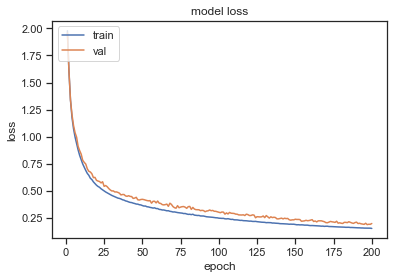

In [67]:
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [68]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 289ms/step - loss: 0.2003 - accuracy: 0.9667

 테스트 정확도: 0.9667


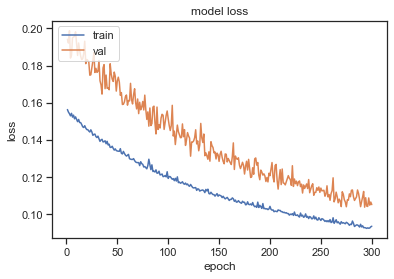

In [70]:
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [71]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 32ms/step - loss: 0.1053 - accuracy: 1.0000

 테스트 정확도: 1.0000
